In [ ]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
from IPython.display import Image
import os
import shutil

from ultralytics import YOLO

In [ ]:
# I will write the contents of the cell to a file
#USARE QUESTO FILE
%%writefile traffic_sign_classes_germ.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ./traffic_sign_dataset/ # dataset root dir
train: ./traffic_sign_dataset/images/train_germ/ # train images (relative to 'path')
val: ./traffic_sign_dataset/images/val_germ # val images (relative to 'path')
test:  # test images (optional)

#Classes
nc: 4  # number of classes

#class names
names: ['PROHIBITORY', 'DANGER', 'MANDATORY', 'OTHER']

Writing traffic_sign_classes_germ.yaml


In [ ]:
# I will write the contents of the cell to a file
#NON USARE
%%writefile traffic_sign_classes_fin.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ./traffic_sign_dataset/ # dataset root dir
train: ./traffic_sign_dataset/images/train/ # train images (relative to 'path')
val: ./traffic_sign_dataset/images/val/ # val images (relative to 'path')
test:  # test images (optional)

#Classes
nc: 3  # number of classes

#class names
names: ['PROHIBITORY', 'DANGER', 'MANDATORY']

Writing traffic_sign_classes_fin.yaml


In [ ]:
# I will write the contents of the cell to a file

%%writefile traffic_sign_detection_1.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ./traffic_sign_dataset/ # dataset root dir
train: ./traffic_sign_dataset/images/train/ # train images (relative to 'path')
val: ./traffic_sign_dataset/images/val # val images (relative to 'path')
test:  # test images (optional)

#Classes
nc: 1  # number of classes

#class names
names: ['TRAF_SIGN']

Writing traffic_sign_detection_1.yaml


In [ ]:
# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO('./yolo_8_3_classes_best.pt') # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="traffic_sign_classes_germ.yaml", epochs=7, imgsz=640)  # train the model

In [ ]:
results = model.val()  # evaluate model performance on the validation set

In [ ]:
from google.colab import files
files.download('./runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

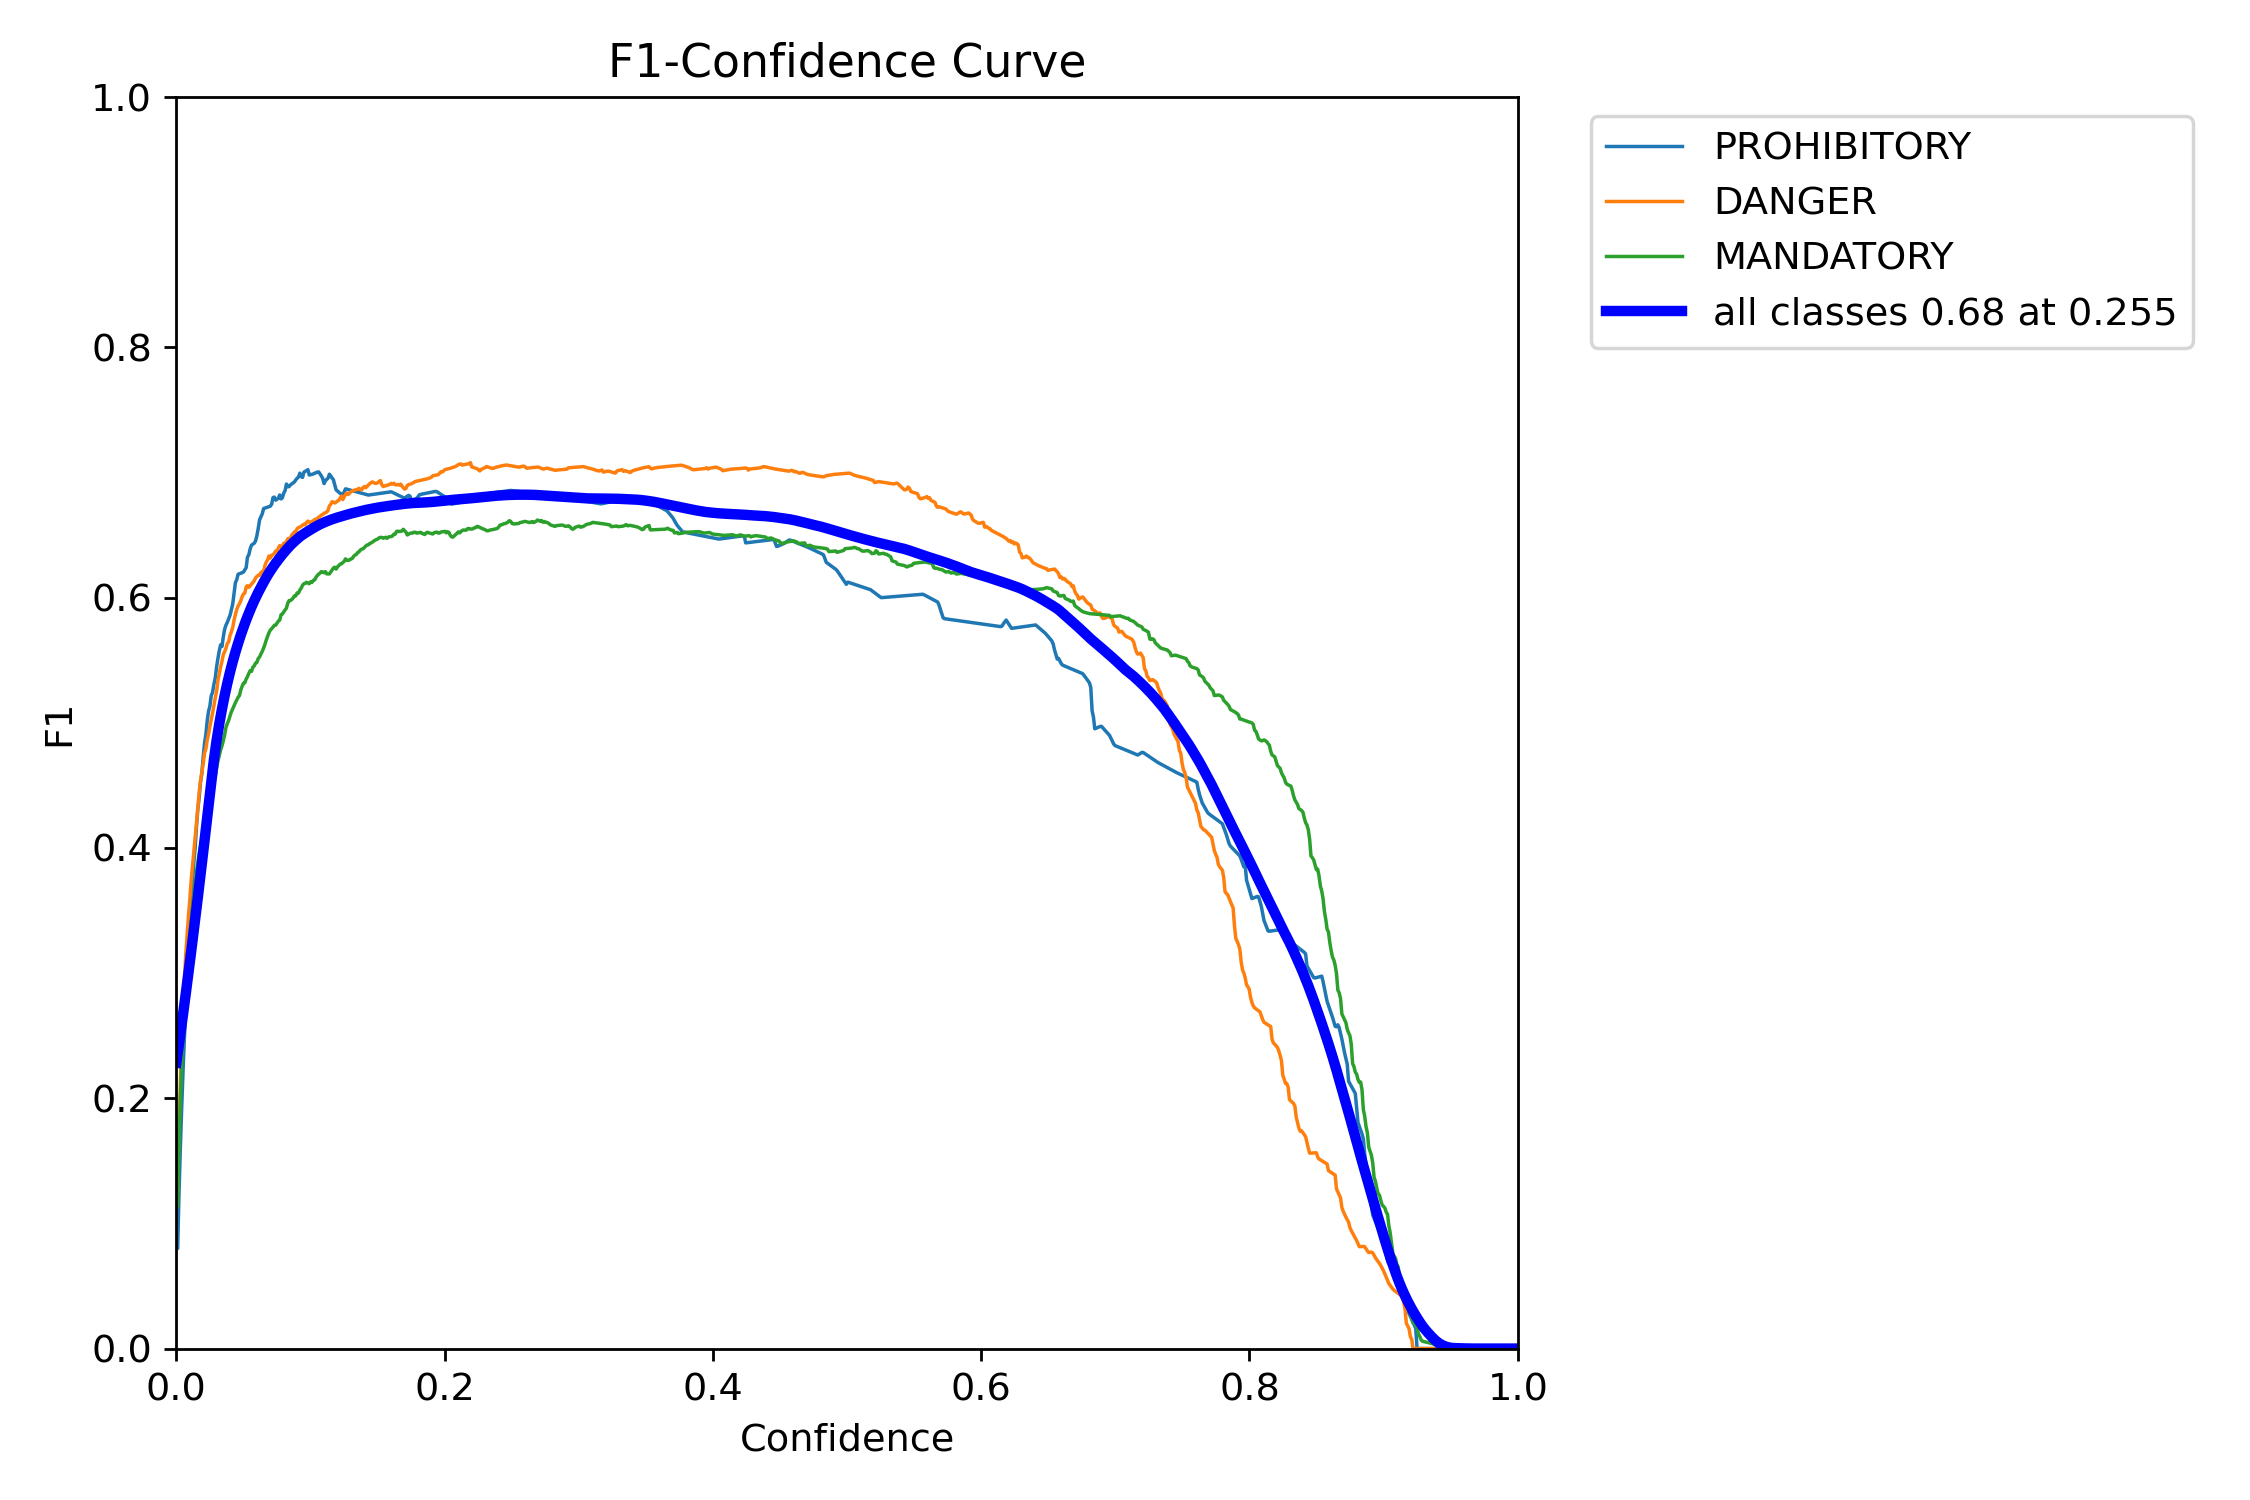

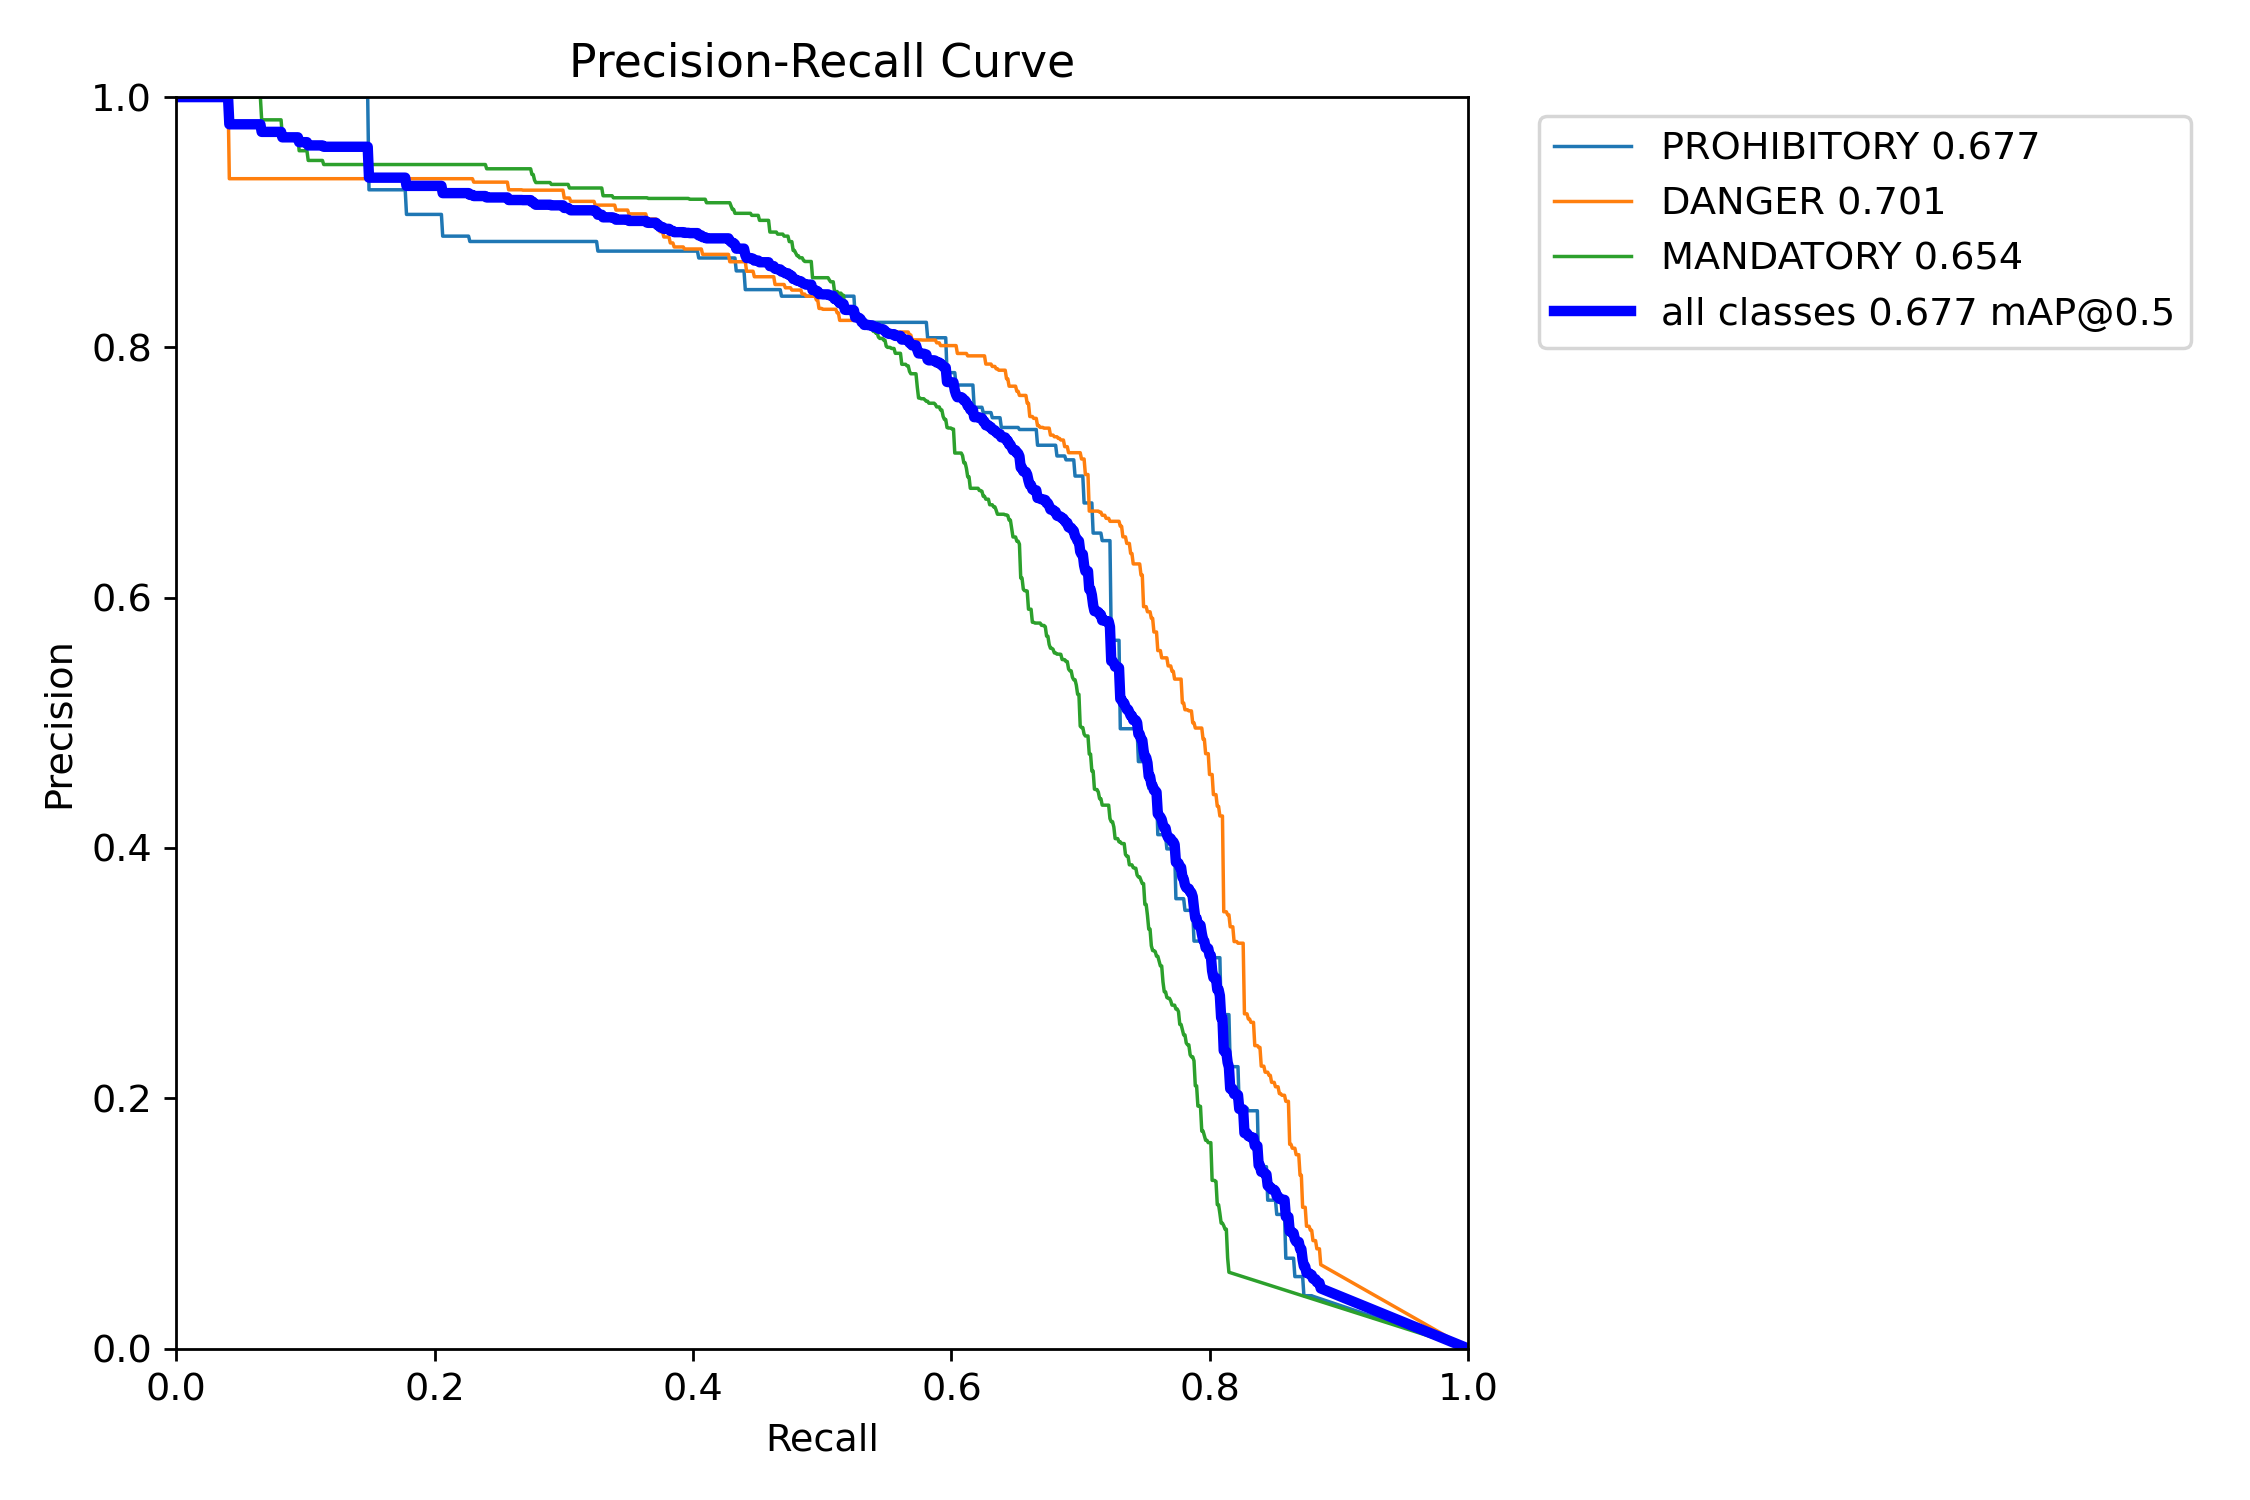

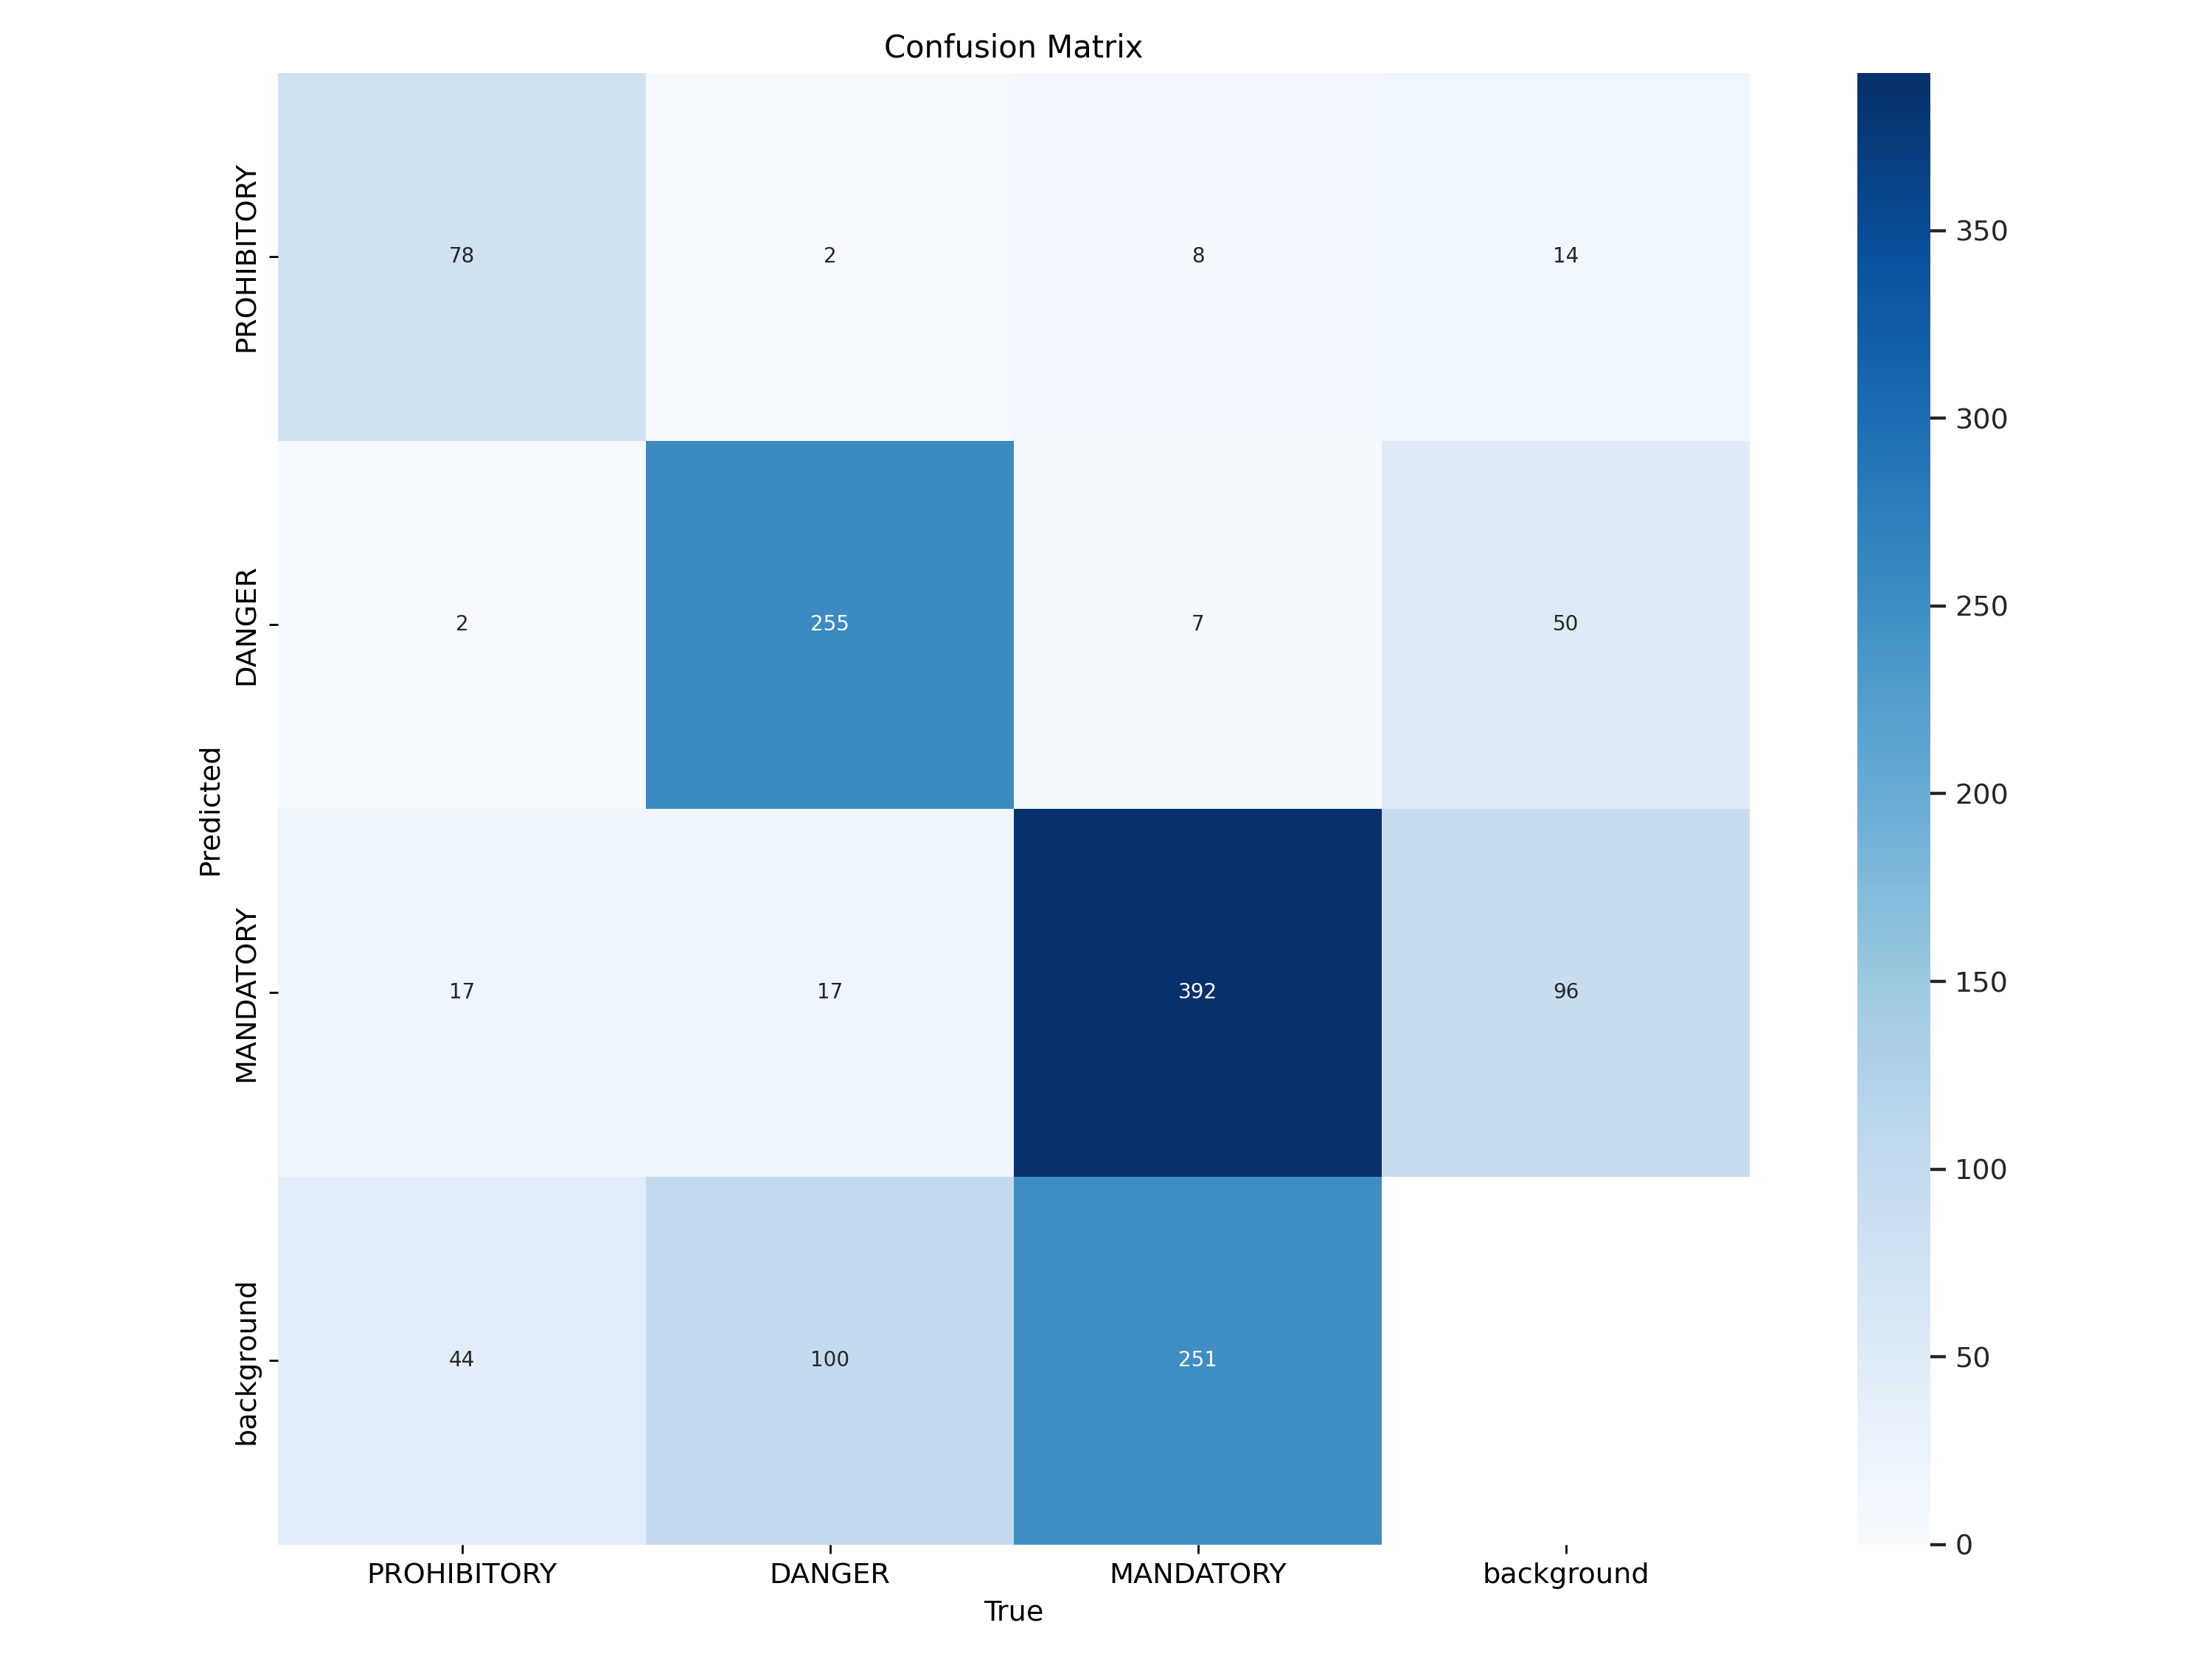

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png')
y = Image(filename='runs/detect/train/PR_curve.png')
z = Image(filename='runs/detect/train/confusion_matrix.png')
display(x, y,z)

***TESTING PHASE***

In [ ]:
def rm_empty_file(path):

  for each in os.listdir(path+"/labels"):
    f = open(path+"/labels/"+each, "r")

    if f.read() == '':
      os.remove(path+"/labels/"+each) #REMOVE EMPTY FILES
      #os.remove(path+"/"+each[:-4]+".png") #REMOVE IMAGE WITHOUT DETECTION
    f.close()

In [ ]:
#EXAMPLES OF RESULTS OF YOLO ON OUR EXTRACTED FRAMES
ROOT = '/content/drive/MyDrive/NAPOLI'
DEST = '/content/drive/MyDrive/napoli_agosto' #specific path
i = 0
#dir = '/content/drive/MyDrive/NAPOLI/FRAMES'

list_dir = ["1", '3', "5"]
list_file =  ["3_90", "5_150","8_240", "10_300", "15_450", "20_600", "25_750", "38_1140"]#["3_90", "4_120", "5_150","8_240", "10_300", "15_450", "20_600", "25_750", "35_1050", "38_1140"]

for dir in list_dir:
  for file in list_file:
      results = model.predict(source=ROOT+"/FRAMES/EXTERNAL/"+dir+"/"+file, save=True, save_txt=True, conf = 0.3)
      rm_empty_file("runs/detect/predict")
      shutil.move("runs/detect/predict", DEST+"/RESULTS_YOLO/7_epoche_3b/"+dir+"/"+file)
      #ho cambiato ROOT CON DEST